In [1]:
%matplotlib inline
from util import Loader
from preprocessor import Preprocessor
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls data

20ng/                        SW/
ACM/                         SW.tar
CSTR/                        SyskillWeber.csv
Irish Economic Sentiment/    SyskillWeberCSVConverter.py
NSF/                         SyskillWebert-Parsed/
Opinosis-Parsed/             trec7-3000/


In [3]:
text_dbs = ['CSTR', 'Irish Economic Sentiment', 'NSF', 'Opinosis-Parsed', 'SyskillWebert-Parsed']

In [94]:
def max_df_reduc(data, intervals):
    c_vects = [CountVectorizer(max_df=max) for max in intervals]
    for cv in c_vects: cv.fit(data)
    word_count = [len(cv.vocabulary_.keys()) for cv in c_vects]
    max_df = list(zip(word_count, intervals))
    max_df = pd.DataFrame(max_df, columns=['n_tokens', 'max_df_param'])
    max_df['max_df_perc'] = max_df.max_df_param * 100
    
    return max_df

def min_df_reduc(data, intervals):
    c_vects = [CountVectorizer(min_df=min) for min in intervals]
    for cv in c_vects: cv.fit(data)
    word_count = [len(cv.vocabulary_.keys()) for cv in c_vects]
    min_df = list(zip(word_count, intervals))
    min_df = pd.DataFrame(min_df, columns=['n_tokens', 'min_df_param'])
    min_df['min_df_perc'] = min_df.min_df_param * 100
    min_df.at[0, 'min_df_perc'] = 0
        
    return min_df

def plot_df(desc):
    min_df = desc['min_df']
    max_df = desc['max_df']
    
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.title('Term minimum frequency')
    plt.ylabel('Number of unique words' + ' (stemized)' if desc['stem'] else '')
    plt.xlabel('% of documents a term occurs')
    plt.xticks(min_df.min_df_perc, ['%0.2f%%' % n for n in min_df.min_df_perc])
    plt.plot(min_df.min_df_perc, min_df.n_tokens)

    plt.subplot(122)
    plt.title('Term maximum frequency (corpus specific stop-words)')
    plt.ylabel('Number of unique words' + ' (stemized)' if desc['stem'] else '')
    plt.xlabel('% of documents a term occurs')
    plt.xticks(max_df.max_df_perc, ['%0.2f%%' % n for n in max_df.max_df_perc])
    plt.plot(max_df.max_df_perc, max_df.n_tokens)
    
    plt.suptitle('Corpus: %s' % desc['corpus'], fontsize=15)
    plt.tight_layout(pad=0.6)
    plt.subplots_adjust(top=0.85)
    
#     plt.figure(2, figsize=(10, 5))
    desc['classes_dist'].plot(kind='barh')
#     plt.barh(desc['classes_dist'])


In [41]:
def describe(corpus, corpus_name, stem=True):
    loader = Loader()
    loaded_corpus = loader.from_files(corpus)
    
    pre = Preprocessor(stem=stem)
    data_pre = pre.transform(loaded_corpus['corpus'])

    min_df_params = [1, .0001, .0005, .001]
    min_df = min_df_reduc(data_pre, min_df_params)
        
    max_df_params = [1.0, .6, .4, .2]
    max_df = max_df_reduc(data_pre, max_df_params)
    
    df_corpus = pd.DataFrame(loaded_corpus['class_index'], columns=['class_index'])
    df_corpus['class'] = df_corpus.apply(lambda c: loaded_corpus['class_names'][c.class_index], axis=1)
    dist = df_corpus.groupby('class').count()/len(df_corpus)
    
    desc = {
        'corpus': corpus_name,
        'n_docs': len(df_corpus)
        'stem': stem,
        'min_df': min_df,
        'max_df': max_df,
        'word_count': max_df.at[0, 'n_tokens'],
        'classes_dist': dist
    }
    return desc


In [42]:
test_db_describe = {d: describe('data/' + d, d) for d in text_dbs}

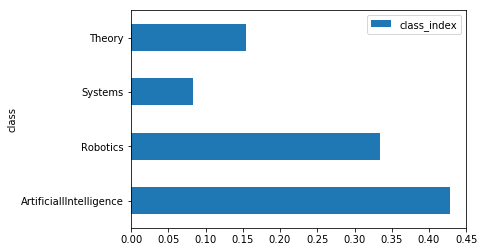

In [100]:
plot_df(test_db_describe['CSTR'])

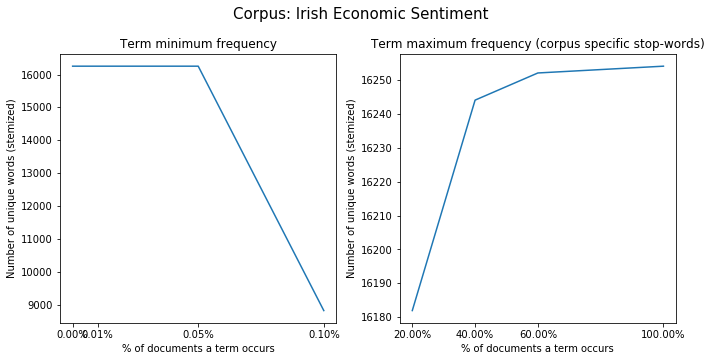

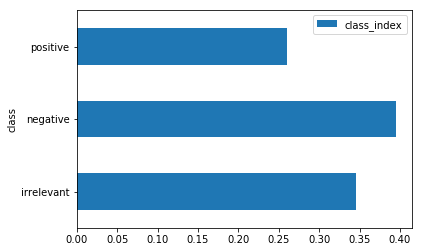

In [101]:
plot_df(test_db_describe['Irish Economic Sentiment'])

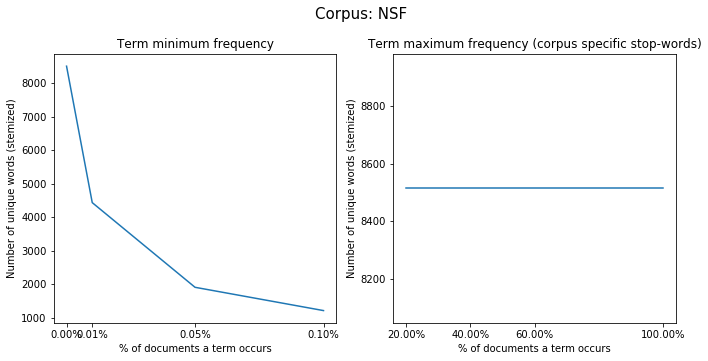

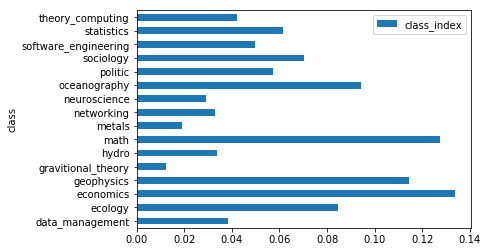

In [97]:
plot_df(test_db_describe['NSF'])

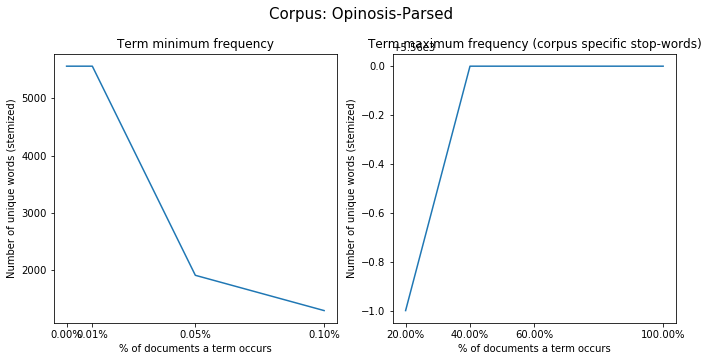

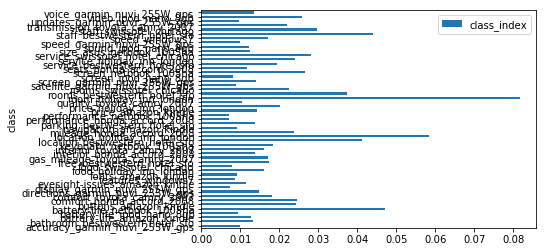

In [98]:
plot_df(test_db_describe['Opinosis-Parsed'])

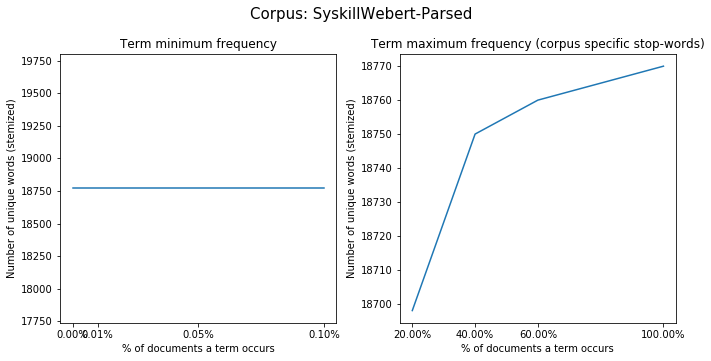

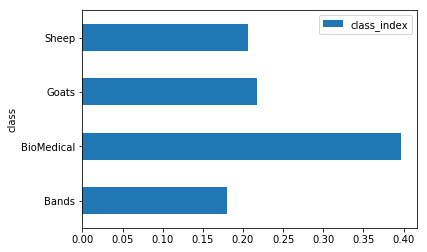

In [99]:
plot_df(test_db_describe['SyskillWebert-Parsed'])